<a href="https://colab.research.google.com/github/MadhaviMRao/Machine-Learning/blob/master/Letter%20Recognition/Letter_Recognition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Letter Recognition
 __By Madhavi Rao__

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Distribution of columns grouped by letter](#section4_1)<br>
    - 4.2 [Finding Correlations](#section4_2)<br>
    - 4.3 [Pairwise relationship between highly correlated values](#section4_3)<br>
    
5. [Data preparation](#section5)<br>

6. [Model Creation and Evaluation](#section6)<br>
    - 6.1 [Preparing train and test data](#section6_1)<br>
    - 6.2 [Logistic Regression Model over train and test data](#section6_2)<br>
    - 6.3 [Decision Tree alogorithm  over train and test data](#section6_3)<br>
    - 6.4 [Random Forest Model over train and test data](#section6_4)<br>
    - 6.5 [K Nearest Neighbors Model over train and test data](#section6_5)<br>
    - 6.6 [Support Vector Machine Model over train and test data](#section6_6)<br>
    - 6.7 [Naive Bayes Model over train and test dataa](#section6_7)<br>
    - 6.8 [EnsembleVoteClassifier](#section6_8)<br>

<a id=section1></a>

## 1. Problem Statement 

![image.jpg](images/image1.jpg)

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. 

The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. 

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. 

We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. 


__Attribute Information:__

1.	letter	capital letter	(26 values from A to Z) 
2.	x-box	horizontal position of box	(integer) 
3.	y-box	vertical position of box	(integer) 
4.	width	width of box	(integer) 
5.	high    height of box	(integer) 
6.	onpix	total # on pixels	(integer) 
7.	x-bar	mean x of on pixels in box	(integer) 
8.	y-bar	mean y of on pixels in box	(integer) 
9.	x2bar	mean x variance	(integer) 
10.	y2bar	mean y variance	(integer) 
11.	xybar	mean x y correlation	(integer) 
12.	x2ybr	mean of x * x * y	(integer) 
13.	xy2br	mean of x * y * y	(integer) 
14.	x-ege	mean edge count left to right	(integer) 
15.	xegvy	correlation of x-ege with y	(integer) 
16.	y-ege	mean edge count bottom to top	(integer) 
17.	yegvx	correlation of y-ege with x	(integer)



<a id=section2></a>

## 2. Data Loading and Description

In [0]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

#


In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')

In [3]:
print('Train data has ',train.shape,' rows and columns')
print('Tets data has ',test.shape,' rows and columns')

Train data has  (16000, 18)  rows and columns
Tets data has  (3999, 17)  rows and columns


In [4]:
train.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


In [5]:
test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


In [6]:
train.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16000.000000


In [7]:
test.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,4.037009,7.061015,5.139785,5.398350,3.527382,6.916979,7.452863,4.633908,5.212303,8.264316,6.384846,7.936734,3.034009,8.318580,3.730433,7.821455,18000.000000
std,1.932355,3.307453,2.059572,2.256691,2.181873,2.012122,2.290816,2.653683,2.364632,2.499806,2.586122,2.115298,2.290954,1.533528,2.549922,1.672581,1154.556192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,16001.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,17000.500000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,7.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000,18000.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000,18999.500000
max,14.000000,15.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,19999.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 17 columns):
x-box    3999 non-null int64
y-box    3999 non-null int64
width    3999 non-null int64
high     3999 non-null int64
onpix    3999 non-null int64
x-bar    3999 non-null int64
y-bar    3999 non-null int64
x2bar    3999 non-null int64
y2bar    3999 non-null int64
xybar    3999 non-null int64
x2ybr    3999 non-null int64
xy2br    3999 non-null int64
x-ege    3999 non-null int64
xegvy    3999 non-null int64
y-ege    3999 non-null int64
yegvx    3999 non-null int64
id       3999 non-null int64
dtypes: int64(17)
memory usage: 531.2 KB


<a id=section3></a>

## 3. Preprocessing

In [10]:
#Check if the data has any null/missing values
def lr(df):
    return df.isna().sum()
lr(train)

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

In [11]:
lr(test)

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
id       0
dtype: int64

Both train and test data do not have any null or missing values.

In [12]:
#check if there are any columns which have constant valyes or std deviation almost equal to zero.

cols_std=[x for x in train.columns[1:] if train[x].std()==0]
print("Train data having std dev as 0 ", cols_std)
cols_std=[x for x in test.columns if test[x].std()==0]
print("Test data having std dev as 0 ",cols_std)

Train data having std dev as 0  []
Test data having std dev as 0  []


All the columns (in both  train and test data) have  varaition in data and there is no column that has std deviation of zero. 

<a id=section4></a>

## 4. Exploratory Data Analysis

<a id=section4_1></a>

### 4.1 Distribution of columns grouped by letter

In [13]:
train.head(3)

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3


Let us plot the mean value of each feature for all the letters.

16


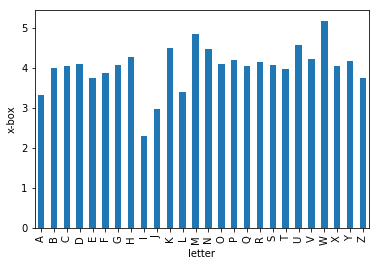

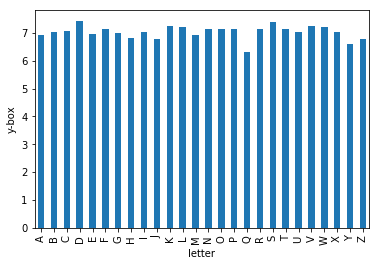

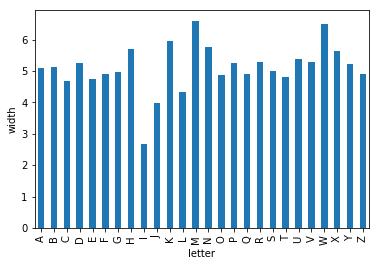

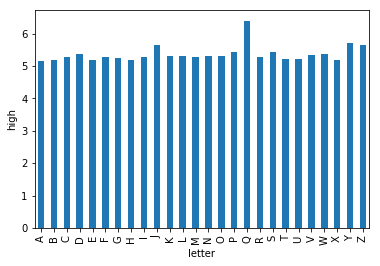

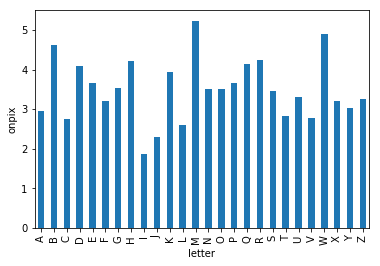

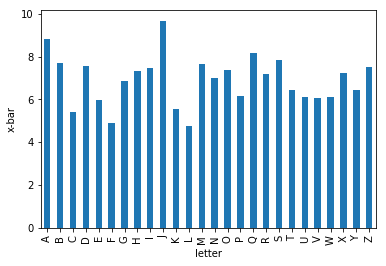

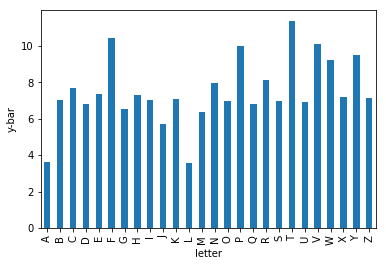

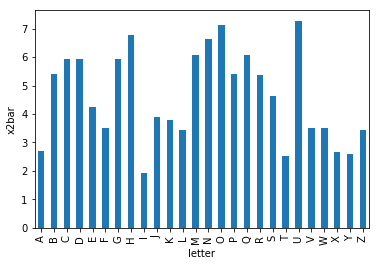

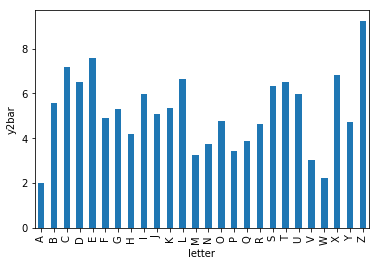

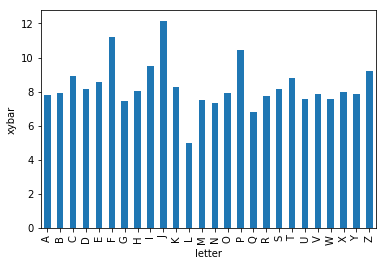

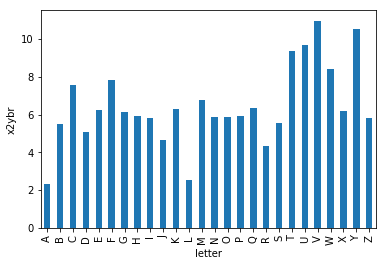

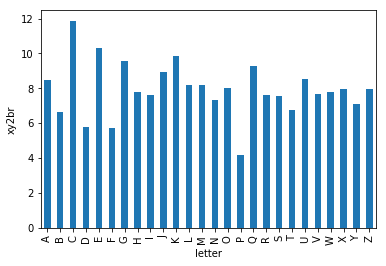

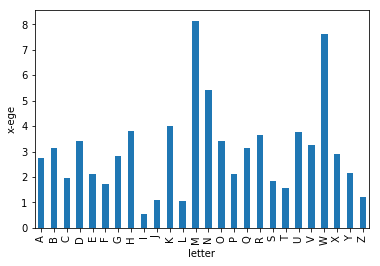

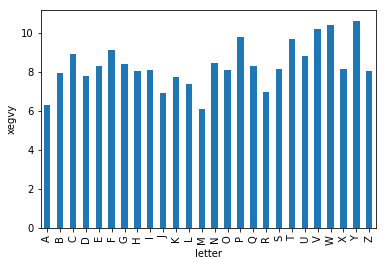

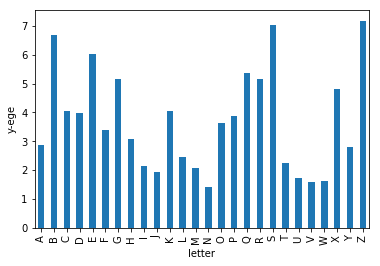

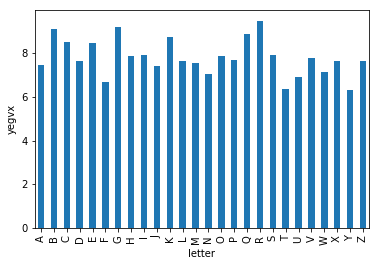

In [14]:
cols= ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
print(len(cols))
#print((cols[0]))
#train.groupby('letter')[a].mean().plot.bar()
for i in range(len(cols)):
    #print(cols[i])
    #ax1=plt.subplot(2, 2, 1)
    #plt.subplot(ax1)
    train.groupby('letter')[cols[i]].mean().plot.bar()
    plt.ylabel(cols[i])
    plt.show()
    


__Observation:__
1. x-box values is highest for W and then for M for obvious reasons of them being wider letters. This value is lowest for I.
2. Width and x- box are quite similar in patterns for all the letters.
3. high value is the highest for Q as this letter extends a little below the line when compared to all other letters.
4. Across all fonts letter M has the maximum no of pixels.
5. Highest mean x of on pixels in box (x-bar) is letter J and A. 
6. The correlation between x and y is highest for letter J.



In [0]:
new_data=train.groupby('letter',as_index = False).mean()

In [16]:
new_data.head(13)

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,A,3.320695,6.917852,5.110585,5.146919,2.963665,8.832543,3.612954,2.715640,2.026856,7.793049,2.336493,8.477093,2.763033,6.298578,2.856240,7.472354,8101.571880
1,B,4.003175,7.017460,5.115873,5.200000,4.633333,7.680952,7.052381,5.388889,5.569841,7.931746,5.514286,6.668254,3.152381,7.934921,6.668254,9.104762,7951.820635
2,C,4.047138,7.074074,4.671717,5.277778,2.740741,5.422559,7.676768,5.919192,7.161616,8.907407,7.562290,11.867003,1.944444,8.900673,4.062290,8.523569,7649.627946
3,D,4.098746,7.429467,5.239812,5.380878,4.095611,7.537618,6.786834,5.921630,6.514107,8.147335,5.070533,5.757053,3.402821,7.810345,3.992163,7.639498,7988.863636
4,E,3.743506,6.943182,4.759740,5.176948,3.659091,5.983766,7.344156,4.233766,7.589286,8.545455,6.256494,10.326299,2.115260,8.300325,6.022727,8.461039,7947.894481
5,F,3.874598,7.123794,4.905145,5.271704,3.202572,4.901929,10.461415,3.508039,4.893891,11.218650,7.839228,5.736334,1.726688,9.114148,3.390675,6.697749,8282.057878
6,G,4.067323,6.981938,4.968801,5.241379,3.541872,6.857143,6.561576,5.934319,5.318555,7.435140,6.146141,9.556650,2.840722,8.399015,5.162562,9.200328,8085.385878
7,H,4.277873,6.814751,5.713551,5.173242,4.219554,7.334477,7.317324,6.792453,4.212693,8.013722,5.914237,7.797599,3.826758,8.049743,3.078902,7.866209,7402.799314
8,I,2.300000,7.040678,2.671186,5.267797,1.862712,7.467797,7.037288,1.918644,5.964407,9.506780,5.805085,7.618644,0.550847,8.076271,2.155932,7.928814,7962.813559
9,J,2.963272,6.772955,3.968280,5.637730,2.307179,9.664441,5.692821,3.911519,5.078464,12.151920,4.637730,8.911519,1.110184,6.938230,1.951586,7.430718,7635.090150


<a id=section4_2></a>

### 4.2 Finding Correlations

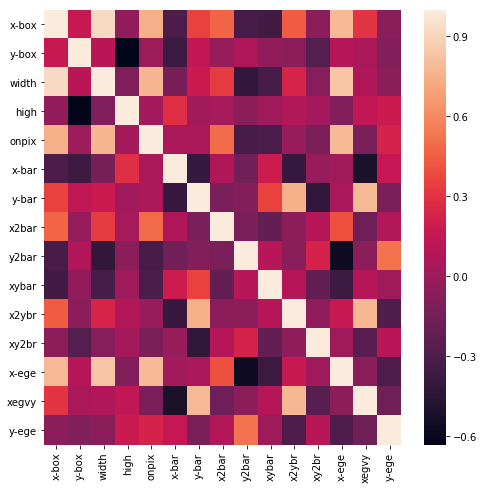

In [17]:
size=16
df=new_data
df1=df.iloc[:,1:size]
corr = df1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr) # V
plt.show()
#print(corr)

In [18]:

# Set the threshold to select only highly correlated features
threshold = 0.5

# List of pairs for correlation above threshold
corr_list = []
#Search for the highly correlated pairs
for i in range(0,10): #for 'size' features
    for j in range(i+1,10): #avoid repetition
        if (abs(corr.iloc[i,j]) >= threshold and abs(corr.iloc[i,j]) < 1):
            corr_list.append([(corr.iloc[i,j]),i,j])
print(corr_list)

sorted_corr_list = sorted(corr_list,reverse=True)
for i,j,k in sorted_corr_list:
    print ("%s and %s = %.2f" % (df1.columns[j],df1.columns[k],i))


[[0.9217073273618437, 0, 2], [0.7458609796598835, 0, 4], [-0.6340722299790882, 1, 3], [0.7761606826808276, 2, 4]]
x-box and width = 0.92
width and onpix = 0.78
x-box and onpix = 0.75
y-box and high = -0.63


__Observations:__
x-box and width, y-box and high are highly correlated.
We can remove width and high features and try to run our models.


<a id=section4_3></a>

### 4.3 Pairwise relationship between highly correlated values

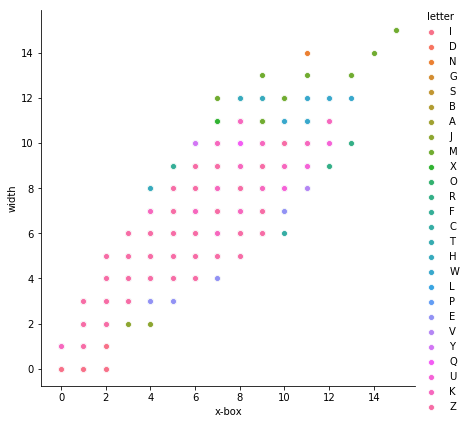

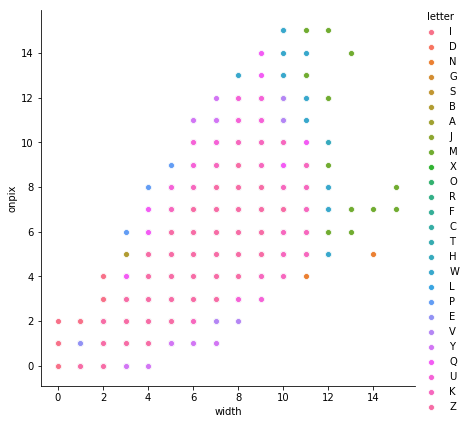

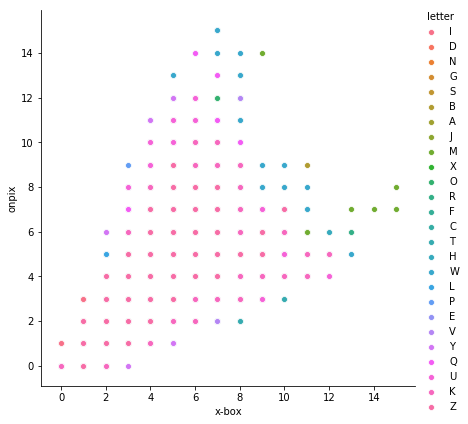

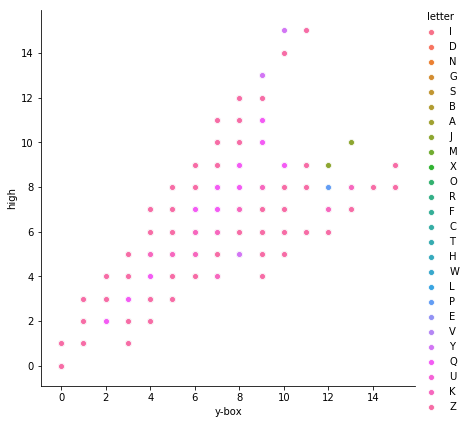

In [19]:
for i,j,k in sorted_corr_list:
    sns.pairplot(train,  size=6, hue="letter",x_vars=df1.columns[j],y_vars=df1.columns[k] )
    plt.show()
#

<a id=section4_1></a>

<a id=section5></a>

## 5. Data preparation

Drop the 'id','width','high'  columns in both train and test data.

In [0]:

train=train.drop(['id','width','high'],axis=1)
test=test.drop(['id','width','high'],axis=1)

In [21]:
"""skf = StratifiedKFold(n_splits=50, shuffle=True, random_state=46)
total_score = 0   
for n_fold, (train_idx, valid_idx) in enumerate(skf.split(xtrain_new_sc.values, y.values)):
    print(n_fold)
    #model = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
    model=   RandomForestClassifier(random_state = 0,
                                    criterion = 'entropy',
                                    max_depth = 30,
                                    n_estimators = 500,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    n_jobs = -1)
    model.fit(xtrain_new_sc.iloc[train_idx],y[train_idx])
    measured[valid_idx] = model.predict(xtrain_new_sc.iloc[valid_idx])
    predict += model.predict_proba(xtest_new_sc)/ 50
    total_score += model.score(xtrain_new_sc.iloc[valid_idx],y[valid_idx])
    print("Fold: {} score: {}".format(n_fold,model.score(xtrain_new_sc.iloc[valid_idx],y[valid_idx])))
print('Avg Accuracy', total_score / 50)
"""

'skf = StratifiedKFold(n_splits=50, shuffle=True, random_state=46)\ntotal_score = 0   \nfor n_fold, (train_idx, valid_idx) in enumerate(skf.split(xtrain_new_sc.values, y.values)):\n    print(n_fold)\n    #model = RandomForestClassifier(n_estimators = 500, n_jobs = -1)\n    model=   RandomForestClassifier(random_state = 0,\n                                    criterion = \'entropy\',\n                                    max_depth = 30,\n                                    n_estimators = 500,\n                                    min_samples_split = 2,\n                                    min_samples_leaf = 1,\n                                    n_jobs = -1)\n    model.fit(xtrain_new_sc.iloc[train_idx],y[train_idx])\n    measured[valid_idx] = model.predict(xtrain_new_sc.iloc[valid_idx])\n    predict += model.predict_proba(xtest_new_sc)/ 50\n    total_score += model.score(xtrain_new_sc.iloc[valid_idx],y[valid_idx])\n    print("Fold: {} score: {}".format(n_fold,model.score(xtrain_new_sc.il

<a id=section6></a>

## 6. Model Creation and Evaluation

<a id=section6_1></a>

### 6.1 Preparing train and test data 

In [0]:
#Define the independent variables i.e X.
X = train.loc[:,train.columns != 'letter']

In [23]:
X.shape

(16000, 14)

In [0]:
#define the dependent variable y
y = train.loc[:,train.columns == 'letter']

In [25]:
y.shape

(16000, 1)

In [0]:
#train test data splitting
from sklearn.model_selection import train_test_split
def split_data(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)# train test split using train test split of 70:30 and random state=1
X_train, X_test, y_train, y_test = split_data(X,y)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11200, 14)
(11200, 1)
(4800, 14)
(4800, 1)


<a id=section6_2></a>

### 6.2 Logistic Regression Model over train and test data 

In [0]:
def logistic_reg( X, y):
    
    X_train, X_test, y_train, y_test = split_data(X,y)
    
    from sklearn.linear_model import LogisticRegression
    
    # Train multinomial logistic regression mode
    logreg=LogisticRegression(multi_class='multinomial', solver='newton-cg',C=5)
    logreg.fit(X_train, y_train) 
    
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)  # make predictions on the testing set
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Multinomial logistic regression is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Multinomial logistic regression is:', accuracy_score(y_test,y_pred_test))
    
    return logreg

In [29]:
logreg = logistic_reg(X,y)

Accuracy score for train data using Multinomial logistic regression is: 0.756875
Accuracy score for test data using Multinomial logistic regression is: 0.7535416666666667


We get an accurcay of 75.3 % using multinomial logistic regression.

<a id=section6_3></a>

### 6.3 Decision Tree algorithm  over train and test data 

In [0]:
def dtreeModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.tree import DecisionTreeClassifier
    dtree=DecisionTreeClassifier(random_state = 0)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)  
    y_pred_test = dtree.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Decision Tree algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Decision Tree algorithm is:', accuracy_score(y_test,y_pred_test))
    
      
    
    return dtree


In [31]:
dtree= dtreeModel(X,y)

Accuracy score for train data using Decision Tree algorithm is: 1.0
Accuracy score for test data using Decision Tree algorithm is: 0.8489583333333334


The accuracy has increased with the use of Decision Trees to 78.1%. Let us try with the Grid Search approach of the Decision tree.

#### Applying Decision Tree model with GridSearchCV

In [0]:
def dtreeModel_usingGridSearch(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    
    decision_tree_classifier = DecisionTreeClassifier(random_state = 0)
    tree_para =  [{'criterion':['gini','entropy'],'max_depth': range(2,40),  'max_features': ['sqrt', 'log2', None] }]
         
    grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10,refit='AUC')
    grid_search.fit(X_train, y_train)
    
    y_pred_train = grid_search.predict(X_train)  
    y_pred_test = grid_search.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Decision Tree GridSearch algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Decision Tree GridSearch algorithm is:', accuracy_score(y_test,y_pred_test))
    

    return dtree

In [33]:
dtree_GS= dtreeModel_usingGridSearch(X,y) ##
#Accuracy score for train data using Decision Tree GridSearch algorithm is: 0.9991964285714285
#Accuracy score for test data using Decision Tree GridSearch algorithm is: 0.865

Accuracy score for train data using Decision Tree GridSearch algorithm is: 0.9991964285714285
Accuracy score for test data using Decision Tree GridSearch algorithm is: 0.865


The accuracy has  incresed with the use of decision trees Grid Serach CV. We get a score of 86.5%

<a id=section6_4></a>

### 6.4 Random Forest Model over train and test data 

In [0]:
def RFModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestClassifier
    RF=RandomForestClassifier(random_state = 0)
    RF.fit(X_train, y_train)
    y_pred_train = RF.predict(X_train)  
    y_pred_test = RF.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Random Forest algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Random Forest algorithm is:', accuracy_score(y_test,y_pred_test))
    
  
    return RF

In [35]:
rfmodel= RFModel(X,y)

Accuracy score for train data using Random Forest algorithm is: 0.9991071428571429
Accuracy score for test data using Random Forest algorithm is: 0.923125


The score has significantly incresed to 92.3% with the use of Random Forest algorithm. Let us try to tune the parameters to see if we can make it better.

In [0]:
def RFModel_tune(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestClassifier
    #RF=RandomForestClassifier(random_state = 0)
    RF=RandomForestClassifier(random_state = 0,
                                n_estimators = 45,
                                min_samples_split = 2,
                                min_samples_leaf = 1)
    RF.fit(X_train, y_train)
    y_pred_train = RF.predict(X_train)  
    y_pred_test = RF.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
  
    return RF


In [37]:
rfmodel_hyper_para_tuning= RFModel_tune(X,y)

Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 1.0
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.95375


  The accuracy has increased after tuning the hyperparameters. We get a score of 95.3 % now.
Let us try with the Random forest CV model

In [0]:
def RFCVModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.ensemble import RandomForestClassifier
    RF=RandomForestClassifier(random_state = 0)
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import randint as sp_randint

    param_dist1 = {"max_depth": range(2,5),
                  "min_samples_split": sp_randint(2, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                  }
    param_dist = {"max_depth": range(2,20),
                  "min_samples_split": sp_randint(2, 15),
                  "min_samples_leaf": sp_randint(1, 15),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                  }
    # run randomized search
    n_iter_search = 25 
    random_search = RandomizedSearchCV(RF, param_distributions = param_dist,
                                       n_iter = n_iter_search,
                                       cv = 3, verbose=2,
                                       n_jobs = -1)
    
    random_search.fit(X_train, y_train)
    y_pred_train = random_search.predict(X_train)  
    y_pred_test = random_search.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    
    return random_search

In [0]:
#rf_rand_search_model= RFCVModel(X,y)


# This has a very high training time. Also the accuracy is lower than the random forest with hyper parametre tuning.

# 
#Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9982142857142857
#Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.9529166666666666

The accuracy we get 93.6.2 % is little lower than the random forest with hyper parameter tuning. Also this took higher training time .

In [40]:
def RFModel_post_tune(X,y):
  X_train, X_test, y_train, y_test = split_data(X,y)
  from sklearn.ensemble import RandomForestClassifier
  #RF=RandomForestClassifier(random_state = 0)
  RF=RandomForestClassifier(random_state = 0,
                            bootstrap= True,
                            criterion= 'gini',
                            max_depth= 16,
                            max_features= 'log2',
                            min_samples_leaf= 3,
                            min_samples_split= 7,
                            n_estimators= 700)
  RF.fit(X_train, y_train)
  y_pred_train = RF.predict(X_train)  
  y_pred_test = RF.predict(X_test) 
    
  from sklearn.metrics import accuracy_score
  print('Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_train,y_pred_train))
  print('Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is:', accuracy_score(y_test,y_pred_test))
    
  return RF

RFModel_post_tune(X,y)


Accuracy score for train data using Random Forest(With hyper parameter tuning) algorithm is: 0.9882142857142857
Accuracy score for test data using Random Forest(With hyper parameter tuning) algorithm is: 0.936875


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

<a id=section6_5></a>

In [0]:
#rf_rand_search_model.best_params_

<a id=section6_5></a>

### 6.5 K Nearest Neighbors Model over train and test data 

In [42]:
accuracy_list = []
def check_n_val(X,y):
    
    import numpy as np
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    X_train, X_test, y_train, y_test = split_data(X,y)
    
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred_i))
        
    print("Maximum accuracy and the corresponding value of k is",max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

best_n_for_knn= check_n_val(X,y)

Maximum accuracy and the corresponding value of k is (0.9579166666666666, 1) respectively.


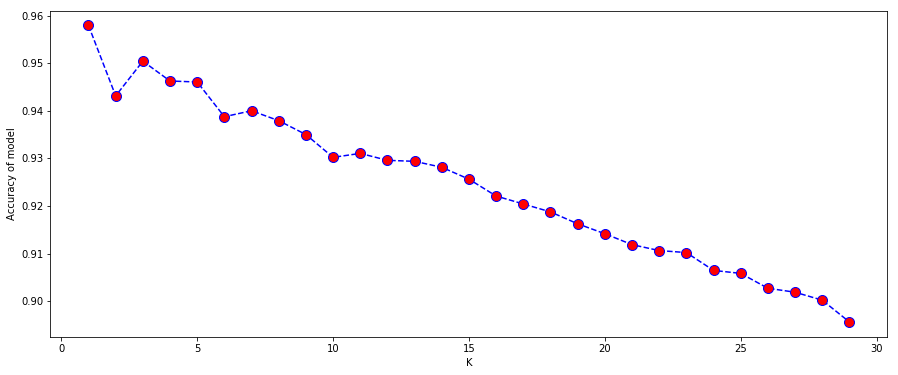

In [43]:

def generate_k_Plot():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate_k_Plot()

In [44]:
#KNN
def KNNModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.neighbors import KNeighborsClassifier
    
    knn_model1 = KNeighborsClassifier(n_neighbors = 1)
    knn_model1.fit(X_train, y_train)
    

    y_pred_train = knn_model1.predict(X_train)  
    y_pred_test = knn_model1.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using K Nearest neighbours algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using K Nearest neighbours) algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    
    return knn_model1

knn_model1= KNNModel(X,y)

Accuracy score for train data using K Nearest neighbours algorithm is: 1.0
Accuracy score for test data using K Nearest neighbours) algorithm is: 0.9579166666666666


The accuracy obtained using KNN is 95.7 %. Let us try to tune this using Randomized search CV .

In [45]:
def KNNModel_CV(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import RandomizedSearchCV
    param_dist = {                            #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    n_iter_search = 25
    knn_model_ = KNeighborsClassifier(n_neighbors=1)
    knn_model2 = RandomizedSearchCV(knn_model_,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
    
    knn_model2.fit(X_train, y_train)
    

    y_pred_train = knn_model2.predict(X_train)  
    y_pred_test = knn_model2.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using K Nearest neighbours(RandomizedSearchCV) algorithm is:', accuracy_score(y_train,y_pred_train))
    print(knn_model2.best_params_)
    print('Accuracy score for test data using K Nearest neighbours(RandomizedSearchCV) algorithm is:', accuracy_score(y_test,y_pred_test))
        
    
    return knn_model2

knn_model2= KNNModel_CV(X,y)

Accuracy score for train data using K Nearest neighbours(RandomizedSearchCV) algorithm is: 1.0
{'metric': 'manhattan', 'leaf_size': 128, 'algorithm': 'ball_tree'}
Accuracy score for test data using K Nearest neighbours(RandomizedSearchCV) algorithm is: 0.9516666666666667


The accuracy of KNN with Randomized Searcg CV is  95.1 %.

<a id=section6_6></a>

### 6.6 Support Vector Machine Model over train and test data 

In [46]:
#SVM
def SVM_Model(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.svm import SVC
    from sklearn import metrics
    
    svc = SVC(random_state = 0) 
    svc.fit(X_train,y_train)
     
    y_pred_train = svc.predict(X_train)  
    y_pred_test = svc.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using SVM algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using SVM algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    return svc

svc= SVM_Model(X,y)



Accuracy score for train data using SVM algorithm is: 0.9924107142857143
Accuracy score for test data using SVM algorithm is: 0.9716666666666667


We get a very accuracy of 97.1 % using SVM with default parameters. Let us try to tune the parameters. 

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
def SVC_mean_Score(X,y):
    svc = SVC(kernel='rbf',random_state = 0)
    svc1 = SVC(kernel='poly',random_state = 0)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
    scores1 = cross_val_score(svc1, X, y, cv=10, scoring='accuracy') 
    print(scores.mean())
    print(scores1.mean())
    return 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def CVAccuracy1(gamma_range):
  #gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
  acc_score=[]
  for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
  plt.plot(gamma_range,acc_score)
    
  plt.xlabel('Value of gamma for SVC ')
   
  plt.xticks(np.arange(0.001,100,5))
   
  plt.ylabel('Cross-Validated Accuracy')
    
  return






In [48]:
#gamma_range1=[0.0001,0.001,0.01,0.1,1,10,100]


SVC_mean_Score(X,y)


0.9703693128665369
0.9431870324562809


We get mean score of  97 % when 'rbf' kernel  is used and  94.3 % poly kernel is used. 
So we will tune further using rbf kernel.

In [0]:
#CVAccuracy1(gamma_range1)

<a id=section6_7></a>

**We can see that for gamma > 10 the kernel is performing poorly. We can also see a sharp dip in accuracy score when gamma is around 1.Let us look into more details for the range 0.0001 to 0.1.**

In [0]:
import time


340.1696984767914


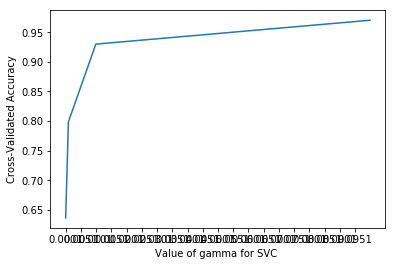

In [51]:
gamma_range2=[0.0001,0.001,0.01,0.1]
#gamma_range3=[0.001,0.005,0.01,0.02]
start = time. time()
def CVAccuracy1(gamma_range):
  
  acc_score=[]
  for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
    
  plt.plot(gamma_range,acc_score)
    
  plt.xlabel('Value of gamma for SVC ')
   
  plt.xticks(np.arange(0.0001,0.1,0.005))
   
  plt.ylabel('Cross-Validated Accuracy')
    
  return

CVAccuracy1(gamma_range2)
end = time. time()
print(end - start)

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
start = time. time()
model_cv.fit(X,y)
end = time. time()
print(end-start)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.9min finished


655.2106354236603


In [53]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.305365,0.011420,1.520736,0.009551,1,0.01,"{'C': 1, 'gamma': 0.01}",0.923438,0.920625,0.930937,0.921250,0.930625,0.925375,0.004513,5,0.939609,0.938828,0.940312,0.941172,0.939375,0.939859,0.000811
1,4.196775,0.301444,2.344697,0.202461,1,0.001,"{'C': 1, 'gamma': 0.001}",0.790000,0.770312,0.806250,0.794687,0.790000,0.790250,0.011604,10,0.796797,0.802891,0.796797,0.797031,0.799844,0.798672,0.002404
2,9.228327,0.418167,2.682663,0.185656,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.619375,0.603125,0.621875,0.628437,0.620000,0.618563,0.008361,12,0.628281,0.627188,0.617188,0.623281,0.630000,0.625188,0.004569
3,1.950000,0.138065,1.138891,0.087787,10,0.01,"{'C': 10, 'gamma': 0.01}",0.957500,0.960938,0.962812,0.957187,0.961250,0.959937,0.002213,3,0.984922,0.986172,0.984766,0.984922,0.986172,0.985391,0.000640
4,2.281543,0.147028,1.555660,0.019537,10,0.001,"{'C': 10, 'gamma': 0.001}",0.869062,0.858750,0.875938,0.866563,0.870625,0.868188,0.005630,7,0.883203,0.881875,0.881250,0.880859,0.881328,0.881703,0.000817
5,4.201679,0.315382,2.274428,0.163094,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.779062,0.757812,0.788125,0.778125,0.771250,0.774875,0.010079,11,0.780703,0.789141,0.781484,0.775547,0.781484,0.781672,0.004343
6,2.008356,0.117968,1.064914,0.077437,100,0.01,"{'C': 100, 'gamma': 0.01}",0.958438,0.964688,0.967812,0.964063,0.964063,0.963812,0.003026,1,0.998828,0.998437,0.998359,0.998125,0.998594,0.998469,0.000235
7,2.308817,0.162535,1.145424,0.081505,100,0.001,"{'C': 100, 'gamma': 0.001}",0.922813,0.918125,0.924687,0.918438,0.925625,0.921937,0.003121,6,0.946641,0.943672,0.943672,0.946016,0.941953,0.944391,0.001713
8,2.411452,0.020227,1.604125,0.017451,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.834688,0.814375,0.845625,0.831250,0.835938,0.832375,0.010187,9,0.842969,0.847344,0.840156,0.842344,0.841875,0.842938,0.002393
9,2.034715,0.135170,1.067029,0.073691,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.957500,0.960938,0.965313,0.960938,0.962812,0.961500,0.002565,2,1.000000,1.000000,0.999922,1.000000,1.000000,0.999984,0.000031


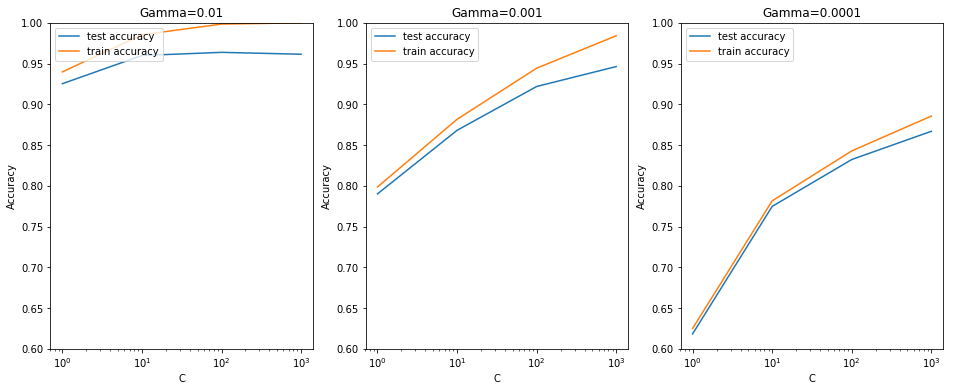

In [54]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

We can see that accuracy is high with gamma value  "0.01" . Accuarcy is increasing with increase in value of C.(100)

In [55]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9638125 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [56]:
def SVM_Model(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.svm import SVC
    from sklearn import metrics
    
    svc = SVC(random_state = 0,C=100, gamma=0.01, kernel="rbf")
    #model = SVC(C=1000, gamma=0.01, kernel="rbf")

    svc.fit(X_train,y_train)
     
    y_pred_train = svc.predict(X_train)  
    y_pred_test = svc.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using SVM algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using SVM algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    return svc

svc= SVM_Model(X,y)


Accuracy score for train data using SVM algorithm is: 0.9985714285714286
Accuracy score for test data using SVM algorithm is: 0.9608333333333333


<a id=section6_7></a>

### 6.7 Naive Bayes Model over train and test data 

In [57]:

# Naive Bayes
def NBModel(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.naive_bayes import GaussianNB
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    

    y_pred_train = nb_model.predict(X_train)  
    y_pred_test = nb_model.predict(X_test) 
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using Naive Bayes algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using Naive Bayes algorithm is:', accuracy_score(y_test,y_pred_test))
        
    
    return nb_model

nb_model= NBModel(X,y)

Accuracy score for train data using Naive Bayes algorithm is: 0.6586607142857143
Accuracy score for test data using Naive Bayes algorithm is: 0.6529166666666667


We get a accuracy of 47.1 % using Naive Bayes algorithm.

<a id=section6_8></a>

### 6.8 EnsembleVoteClassifier

In [58]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


svc = SVC(random_state = 0,C=100, gamma=0.01, kernel="rbf")
knn_model_ = KNeighborsClassifier(n_neighbors=1,metric="manhattan",leaf_size = 128,algorithm="ball_tree")
RF=RandomForestClassifier(random_state = 0,
                            bootstrap= True,
                            criterion= 'gini',
                            max_depth= 16,
                            max_features= 'log2',
                            min_samples_leaf= 3,
                            min_samples_split= 7,
                            n_estimators= 700)


grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [svc,knn_model_,RF, grad_boost, xgb_boost]

eclf = EnsembleVoteClassifier(clfs=[svc,knn_model_,RF, grad_boost, xgb_boost], voting='hard')

labels = ['SVC','KNN model','RandomForest', 'Grad Boost', 'XG Boost', 'Ensemble']
start= time.time()
for clf, label in zip([svc,knn_model_,RF, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))
end= time.time()
print("time taken",end-start)

Mean: 0.966, std: (+/-) 0.005 [SVC]
Mean: 0.956, std: (+/-) 0.006 [KNN model]
Mean: 0.944, std: (+/-) 0.006 [RandomForest]
Mean: 0.915, std: (+/-) 0.009 [Grad Boost]
Mean: 0.879, std: (+/-) 0.008 [XG Boost]
Mean: 0.954, std: (+/-) 0.006 [Ensemble]
time taken 1538.524906873703


SVC is giving better score than the ensemble model. We will use Support Vector Classifier to predict.

In [59]:

def SVM_Model(X,y):
    X_train, X_test, y_train, y_test = split_data(X,y)
    from sklearn.svm import SVC
    from sklearn import metrics
    
    svc = SVC(random_state = 0,C=100, gamma=0.01, kernel="rbf")
    #model = SVC(C=1000, gamma=0.01, kernel="rbf")

    svc.fit(X_train,y_train)
     
    y_pred_train = svc.predict(X_train)  
    y_pred_test = svc.predict(X_test) 
    y_testpredict=svc.predict(test)
    
    from sklearn.metrics import accuracy_score
    print('Accuracy score for train data using SVM algorithm is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data using SVM algorithm is:', accuracy_score(y_test,y_pred_test))
    
    
    return svc,y_testpredict

svc,y_testpredict= SVM_Model(X,y)


Accuracy score for train data using SVM algorithm is: 0.9985714285714286
Accuracy score for test data using SVM algorithm is: 0.9608333333333333


In [60]:

test11 = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')
submit=test11[['id']]
print(type(submit))
submit['letter'] = y_testpredict

submit.to_csv('submit_csvfile_SVC.csv', index=False)

<class 'pandas.core.frame.DataFrame'>


<a id=section6_8></a>

## Conclusion Note

Also __Support Vector Classifer__ is giving the highest accuracy compared to other models with  score of "__96 %__"  hence we choose the algorithm for letter prediction.

__Hyperparameters used__
C=1000

gamma=0.01

kernel="rbf"